## Data Cleaning

In [4]:
# Import required libraries 
import pandas as pd

In [8]:
# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [10]:
# Convert 'TotalCharges' to numeric, invalid values will become NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [13]:
# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

In [15]:
# Drop 'customerID' column (not useful for analysis)
df = df.drop(columns=['customerID'])

In [16]:
# Convert 'SeniorCitizen' from 0/1 to 'No'/'Yes'
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [19]:
 # Create 'TenureGroup' feature to segment customers
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 Year'
    elif tenure <= 24:
        return '1-2 Years'
    elif tenure <= 48:
        return '2-4 Years'
    elif tenure <= 60:
        return '4-5 Years'
    else:
        return '5+ Years'

df['TenureGroup'] = df['tenure'].apply(tenure_group) 
     

In [20]:
# Priview cleaned data 
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 Year
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2-4 Years
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 Year
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2-4 Years
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 Year


In [21]:
df.to_csv('Cleaned_Telco_Customer_Churn.csv', index=False)

## EDA: Exploratory Data Analysis Code

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# For better visuals
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [25]:
# Load cleaned dataset
df = pd.read_csv("Cleaned_Telco_Customer_Churn.csv")

## Basic Summary & Churn Distribution

In [26]:
# Check class balance 
print(df['Churn'].value_counts(normalize = True))

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


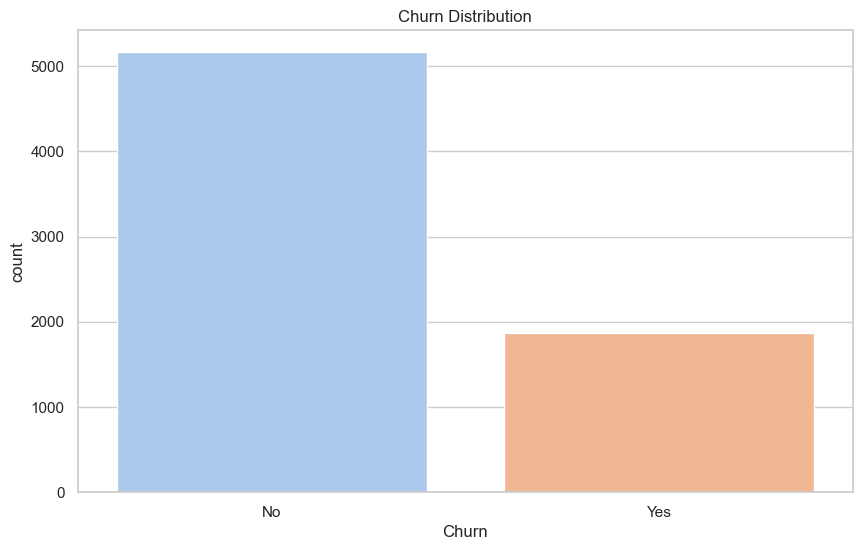

In [27]:
# Plot Churn distibution 
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Churn Distribution')
plt.show()

### Churn by Categorical Features

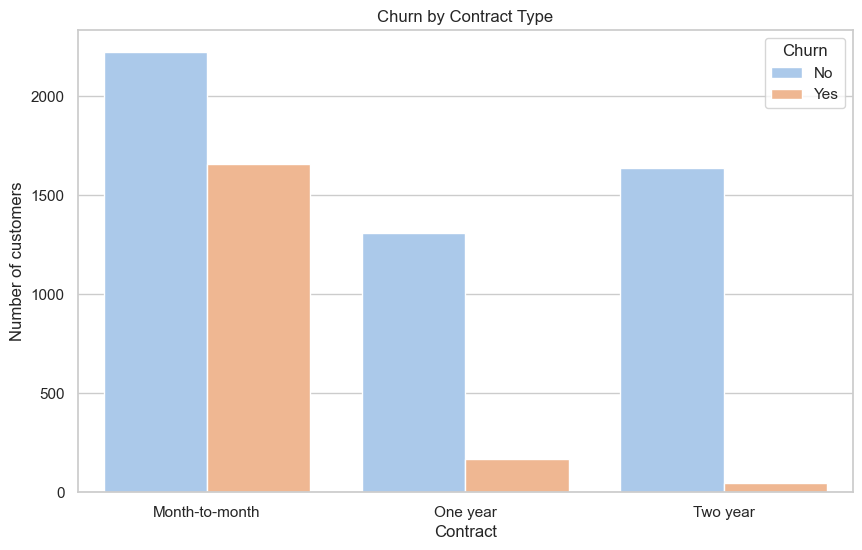

In [31]:
# Churn by Contract Type
sns.countplot(x='Contract', hue='Churn', data =df, palette = 'pastel')
plt.title('Churn by Contract Type')
plt.ylabel('Number of customers')
plt.show()

### Churn by Tenure Group

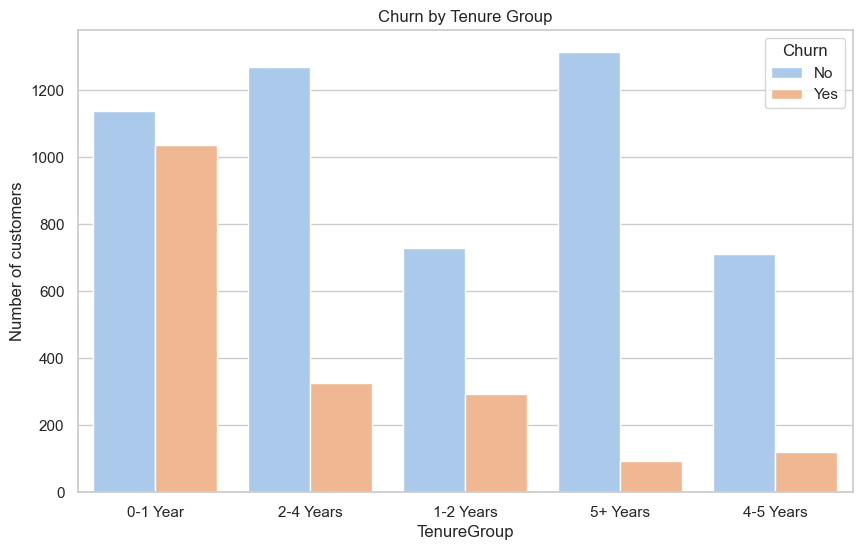

In [33]:
# Churn by Tenure Group
sns.countplot(x='TenureGroup', hue='Churn', data =df, palette = 'pastel')
plt.title('Churn by Tenure Group')
plt.ylabel('Number of customers')
plt.show()

### Churn by Internet Service

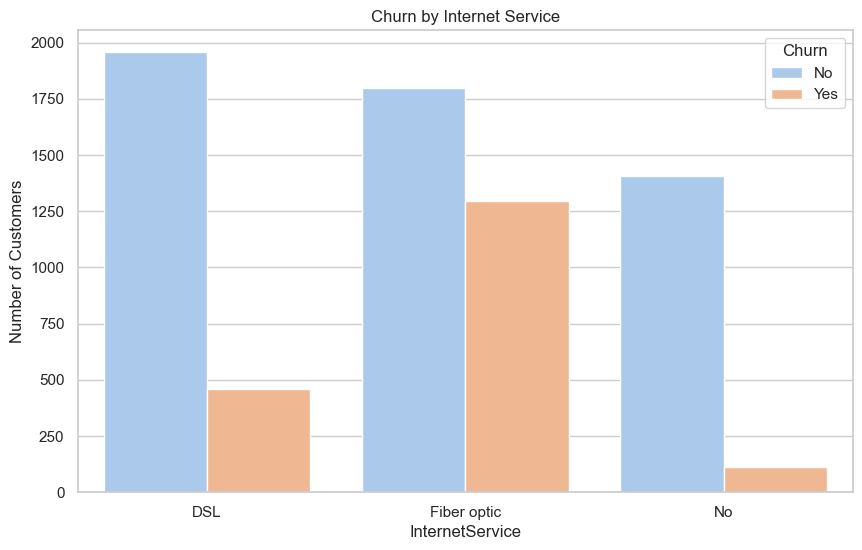

In [34]:
# Churn by Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df, palette='pastel')
plt.title('Churn by Internet Service')
plt.ylabel('Number of Customers')
plt.show()

### Numerical Feature Distributions

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


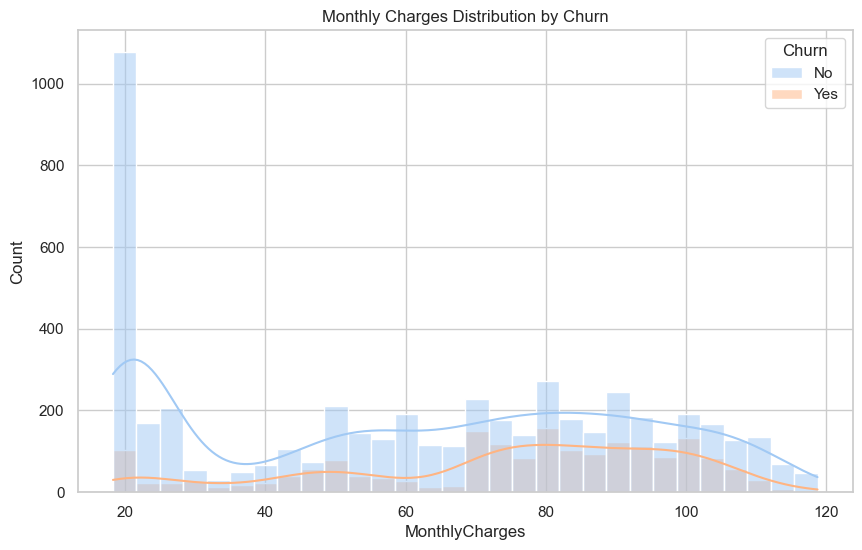

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


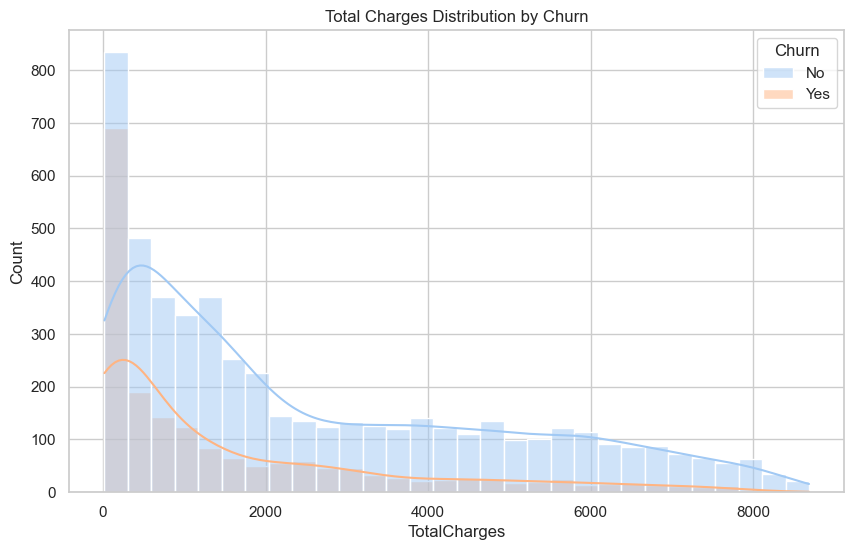

In [36]:
# Monthly Charge Distribution 
sns.histplot(data = df, x = 'MonthlyCharges', hue = 'Churn', bins = 30, kde = True, palette='pastel')
plt.title('Monthly Charges Distribution by Churn')
plt.show()

# Total Charges Distribution 
sns.histplot(data = df, x = 'TotalCharges', hue = 'Churn', bins = 30, kde = True, palette='pastel')
plt.title('Total Charges Distribution by Churn')
plt.show()

### Correlation Heatmap (for numeric features)

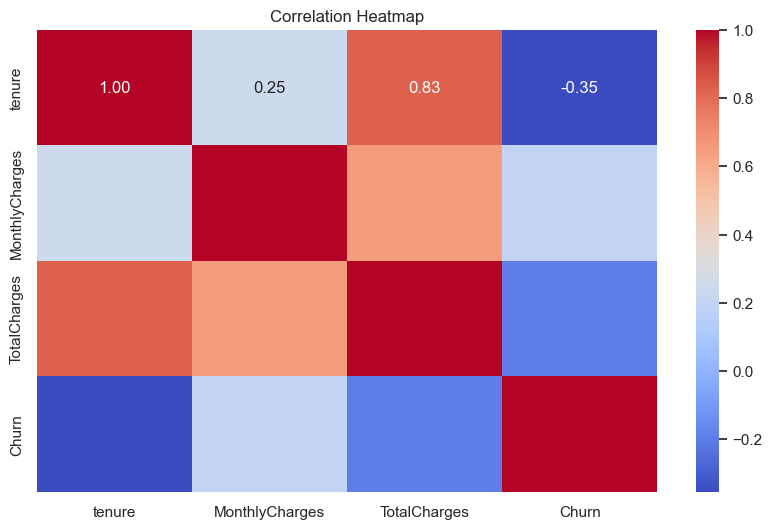

In [39]:
# Encode target variable for correlation
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'No':0, 'Yes':1})

# Compute correlation
corr = df_corr.corr(numeric_only= True)

# Plot heatmap
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()